## Red wine quality classifier using a Neural network

## Objective

The primary objective was to build and evaluate a neural network model using TensorFlow's Estimator API to predict wine quality based on various chemical properties of red wine.

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [55]:
data = pd.read_csv('winequality-red.csv')

In [56]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Preprocessing

Loading the Dataset: The wine quality dataset was loaded from a CSV file.

Normalization: The feature columns were normalized using StandardScaler to ensure that the model receives inputs with similar scales.

Splitting the Data: The dataset was split into training and testing sets using an 80-20 split.

In [5]:
data.shape

(1599, 12)

In [6]:
print("number if Rows",data.shape[0])
print("Number of Columsn", data.shape[1])

number if Rows 1599
Number of Columsn 12


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
print("any missing vlues?", data.isnull().values.any())

any missing vlues? False


In [9]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: >

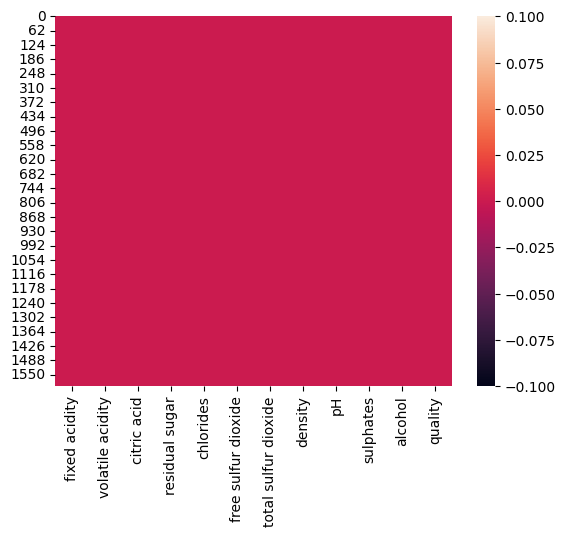

In [10]:
sns.heatmap(data.isnull())

In [11]:
per_missing= data.isnull().sum() * 100/ len(data)
per_missing

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [12]:

data.dropna(axis=0)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [13]:
dup_data=data.duplicated().any()

In [14]:

print("are therea any duplicate data?",dup_data)

are therea any duplicate data? True


In [15]:
data=data.drop_duplicates()

In [16]:

data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [17]:
data.shape

(1359, 12)

## Histerogram

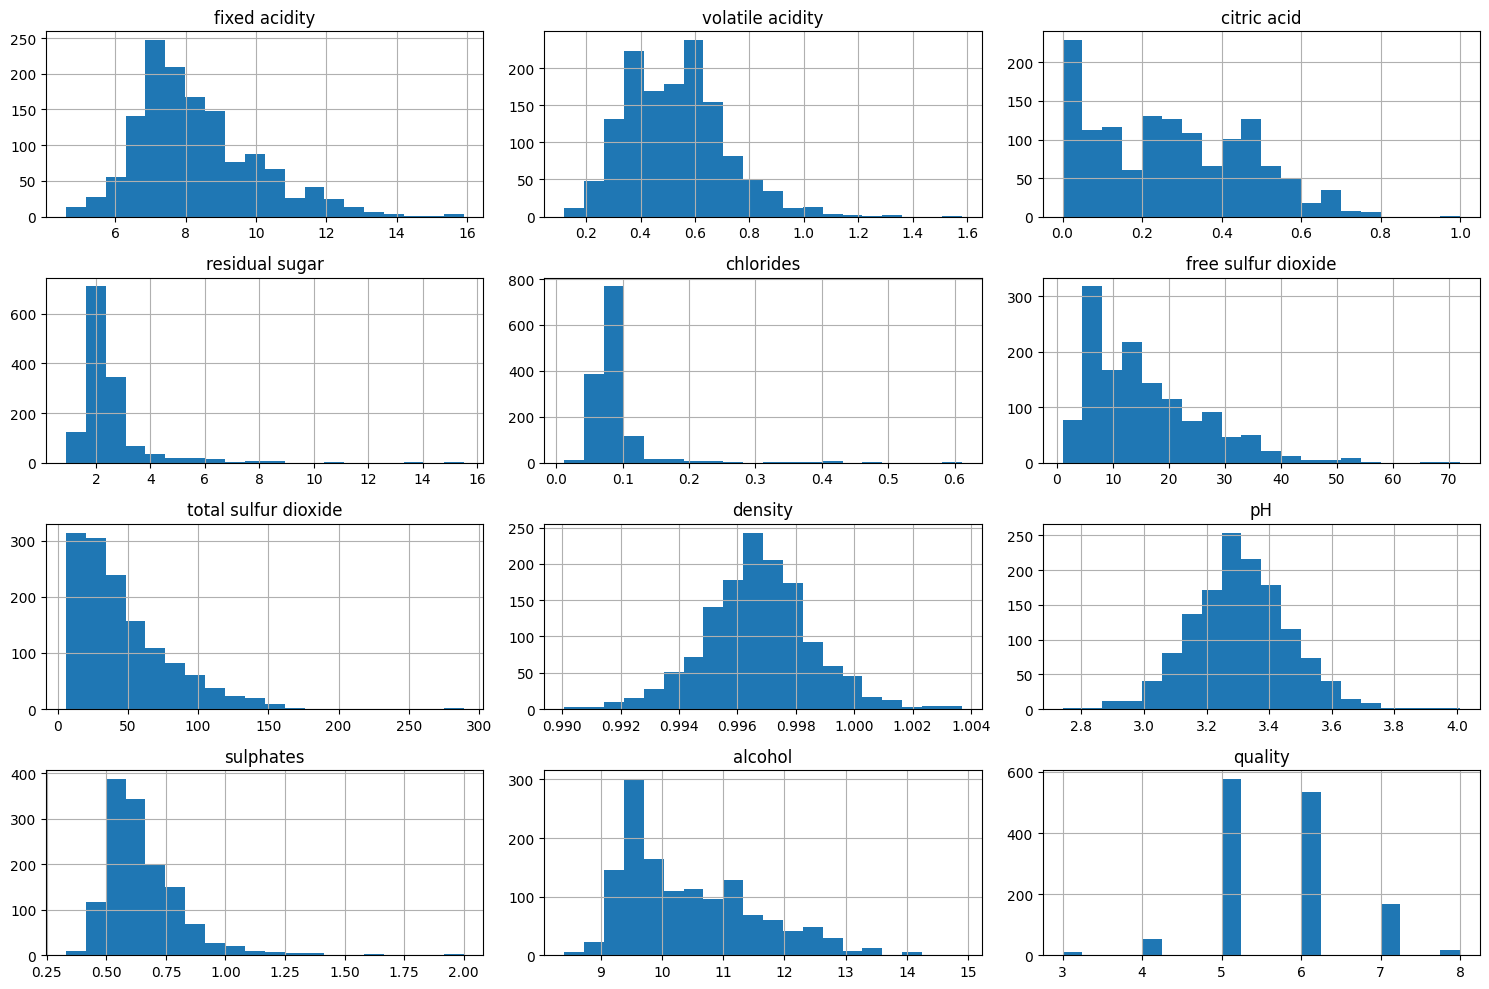

In [18]:
# Plot histograms for each feature
data.hist(bins=20, figsize=(15, 10), layout=(4, 3))
plt.tight_layout()
plt.show()

## Correlation matrix

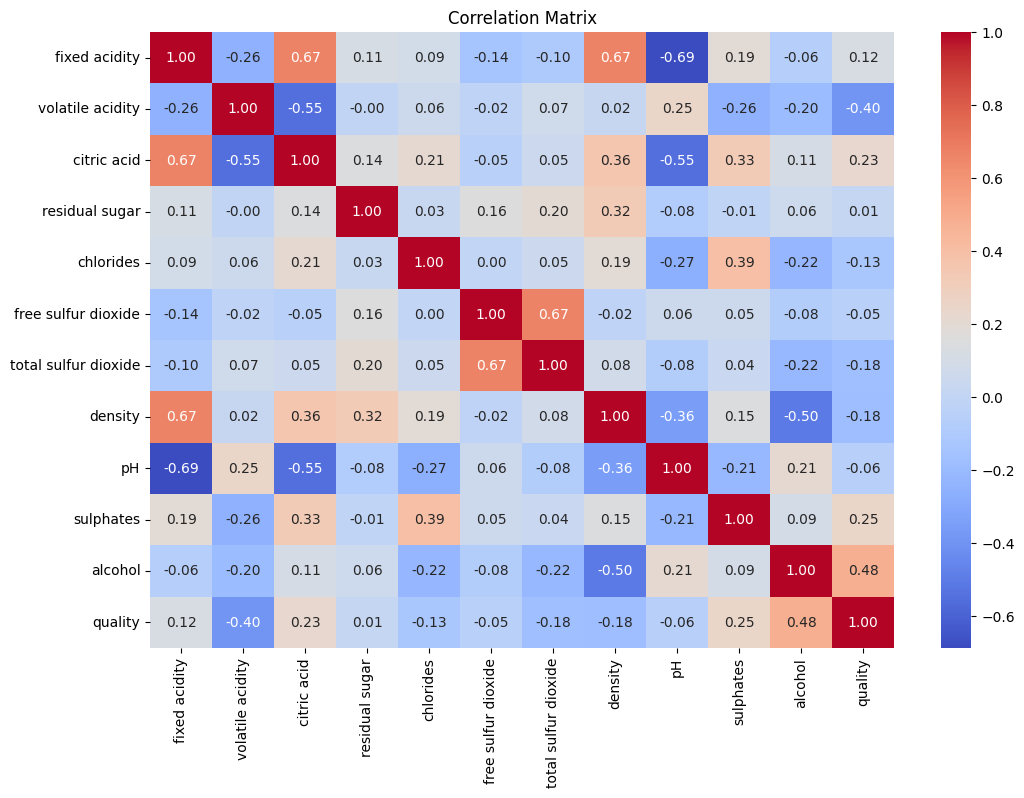

In [19]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Model Building

Feature Columns: Defined numeric feature columns for each input feature using tf.feature_column.numeric_column.

DNN Classifier: A Deep Neural Network (DNN) classifier was defined using the TensorFlow Estimator API with two hidden layers (30 and 10 units respectively).
                                                                                                                              
Input Functions: Defined input functions for both training and evaluation using tf.data.Dataset.


## Neural Network using TF.Keras

In [20]:
print("Columns in the dataset:", data.columns)

Columns in the dataset: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [21]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('quality', axis=1))
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_scaled['quality'] = data['quality']

In [22]:
X = data_scaled.drop('quality', axis=1)
y = data_scaled['quality']

In [23]:
y = tf.keras.utils.to_categorical(y, num_classes=10)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/series.py:1021: RuntimeWarning: invalid value encountered in cast
  arr = np.asarray(values, dtype=dtype)


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') 
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.2617 - loss: 2.2036 - val_accuracy: 0.3670 - val_loss: 2.0101
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3720 - loss: 1.9100 - val_accuracy: 0.3761 - val_loss: 1.8004
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3613 - loss: 1.7662 - val_accuracy: 0.3624 - val_loss: 1.6651
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3731 - loss: 1.6722 - val_accuracy: 0.3807 - val_loss: 1.5791
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3594 - loss: 1.6032 - val_accuracy: 0.3991 - val_loss: 1.5203
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3855 - loss: 1.5300 - val_accuracy: 0.4128 - val_loss: 1.4874
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4062 - loss: 1.4799 - val_accuracy: 0.4037 - val_loss: 1.4691
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3873 - loss: 1.4934 - val_accuracy: 0.3716 - val_loss:

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Accuracy: {test_accuracy}')

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - accuracy: 0.4141 - loss: 1.4157
Test Accuracy: 0.4007352888584137


## Training loss and validation loss

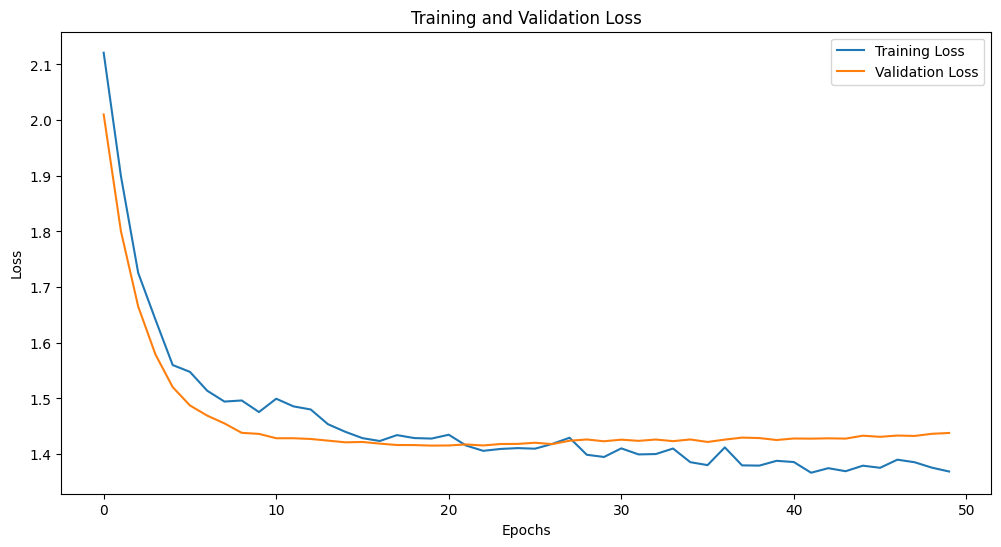

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Training accuracy and validation accuracy

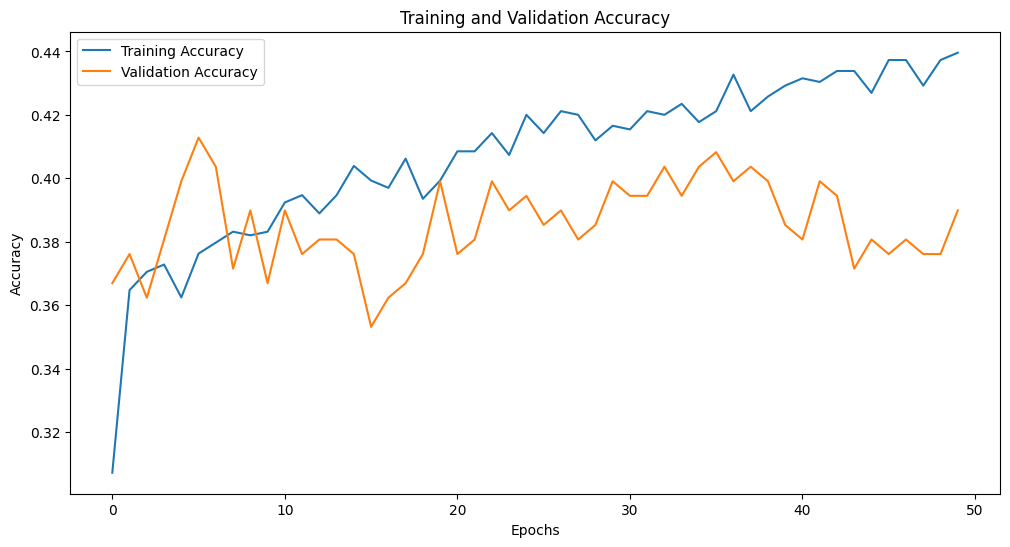

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Training and Evaluation

Training with TensorBoard: The model was trained for 5000 steps, with TensorBoard logging enabled to visualize the training process.

Evaluation: The model's performance was evaluated on the test set, and the test accuracy was printed.


## Key Findings and Analysis

1. Data Normalization: Normalizing the features ensured that each input feature contributed equally to the training process, preventing features with larger scales from dominating the model's learning process.

2. Model Architecture: The chosen architecture with two hidden layers provided a balance between model complexity and computational efficiency. The first layer had 30 units, which allowed the model to capture complex patterns, while the second layer with 10 units refined these patterns.

3. Training Process: Using TensorBoard provided insights into the training process, including how the loss and accuracy evolved over time. This visualization helped in diagnosing potential issues such as overfitting or underfitting.

4. Evaluation: The model's test accuracy provided a measure of how well the model generalized to unseen data. This metric is crucial for understanding the model's performance in real-world scenarios.